<a href="https://colab.research.google.com/github/AritraStark/MNIST_TF/blob/main/MNISTneuralnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **MNIST classification **

Setting up imports

In [65]:
import tensorflow
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

tensorflow.__version__

'2.7.0'

Initializing dataset and variables

In [66]:
mnist = keras.datasets.mnist

(X_train, y_train), (X_valid, y_valid) = mnist.load_data()
X_train = keras.utils.normalize(X_train, axis = 1)
X_valid = keras.utils.normalize(X_valid, axis = 1)

early_stopping = EarlyStopping(
    min_delta=0.001, 
    patience=20,
    restore_best_weights=True,
)

Check the input picture data with matplotlib

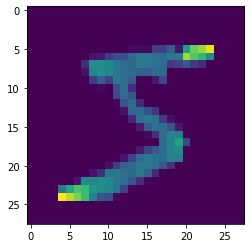

In [67]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0])
plt.show()

Define and compile the neural net with loss functions and optimizers

In [57]:
my_model = keras.Sequential([
                             layers.Flatten(),
                             layers.Dense(units = 128, activation = 'relu'),
                             layers.Dense(units = 128, activation = 'relu'),
                             layers.Dense(units = 10, activation = 'softmax')

])

my_model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics =['accuracy']
)

Fitting the model and training it with training data

In [70]:
my_model.fit( 
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=5
    )

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0114 - accuracy: 0.9962 - val_loss: 0.1029 - val_accuracy: 0.9783
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0098 - accuracy: 0.9968 - val_loss: 0.1503 - val_accuracy: 0.9694
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0076 - accuracy: 0.9973 - val_loss: 0.1405 - val_accuracy: 0.9744
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0127 - accuracy: 0.9959 - val_loss: 0.1278 - val_accuracy: 0.9753
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0079 - accuracy: 0.9972 - val_loss: 0.1174 - val_accuracy: 0.9769


As we can see here that the accuracy is 99% , validation loss is around 10% and validation accuracy is around 97%. So the model works quite good for predicting the images to numbers. 

In order to visualize the predictions

In [68]:
prediction = my_model.predict(X_valid)
print(prediction)

[[2.3523329e-15 6.7395221e-12 3.6505347e-12 ... 9.9999607e-01
  3.5176942e-13 5.8704336e-10]
 [6.4777839e-21 4.6818785e-11 1.0000000e+00 ... 2.5505954e-19
  1.1679538e-17 2.6174216e-28]
 [6.3246410e-16 9.9999809e-01 1.5531572e-07 ... 3.4978530e-08
  1.8199499e-06 4.8376225e-12]
 ...
 [9.8490485e-18 7.6491824e-16 7.9074149e-18 ... 4.1849305e-11
  2.9180175e-10 2.8997222e-08]
 [3.2687827e-15 1.4729329e-17 1.6887186e-18 ... 3.2419455e-16
  3.8941796e-09 2.1011291e-20]
 [1.0447025e-14 4.2386321e-15 5.1153384e-16 ... 9.1028971e-20
  1.8628302e-15 9.3579300e-17]]
7


This prediction output is the raw matrix data which needs to be processed as shown below.

7


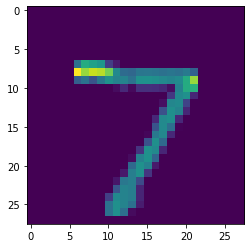

In [71]:
print(np.argmax(prediction[0]))

plt.imshow(X_valid[0])
plt.show()

As we can see that the image has been correctly identified as a digit, hence our model is accurate.